## Creating graphs comparing different centrality measures with degree centrality

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.read_weighted_edgelist("yeast.txt",comments="#",nodetype=str)
threshold_score = 700
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])

Removing 4932

In [4]:
G = nx.relabel_nodes(G, lambda x: x[5:]).copy()

Getting the largest connected component

In [5]:
GC = G.subgraph(max(nx.connected_components(G), key = len)).copy()

Computing the centrality scores for all the nodes

In [7]:
degree_centrality = nx.degree_centrality(GC)

In [8]:
eigenvector_centrality = nx.eigenvector_centrality(GC)

In [9]:
closeness_centrality = nx.closeness_centrality(GC)

In [10]:
betweeness = nx.betweenness_centrality(GC)

In [11]:
subgraph = nx.subgraph_centrality(GC)

In [12]:
interesting_nodes = ['YCL001W', 'YLL058W', 'YKL207W', 'YEL051W', 'YGL101W', 'YLR299W', 'YLR308W', 'YCL030C', 'YDR357C', 'YJL046W', 'YLL057C', 'YPL097W', 'YBL080C', 'YPR128C', 'YOL118C', 'YLR125W', 'YPR079W', 'YIL145C', 'YPL145C', 'YOR356W', 'YGL144C', 'YKR007W', 'YHR013C', 'YGL094C', 'YNL111C', 'YIL088C']

Creating lists so we can plot

In [45]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
node_colours = []
node_sizes = []
for key in GC.nodes():
    degree_x.append(degree_centrality[key])
    eigen_y.append(eigenvector_centrality[key])
    closeness_y.append(closeness_centrality[key])
    betweeness_y.append(betweeness[key])
    subgraph_y.append(subgraph[key])
    if key in interesting_nodes:
        node_colours.append("red")
        node_sizes.append(20*4)
    else:
        node_colours.append("blue")
        node_sizes.append(10)

KeyError: 'Q0010'

Plot of degree vs eigenvector centrality

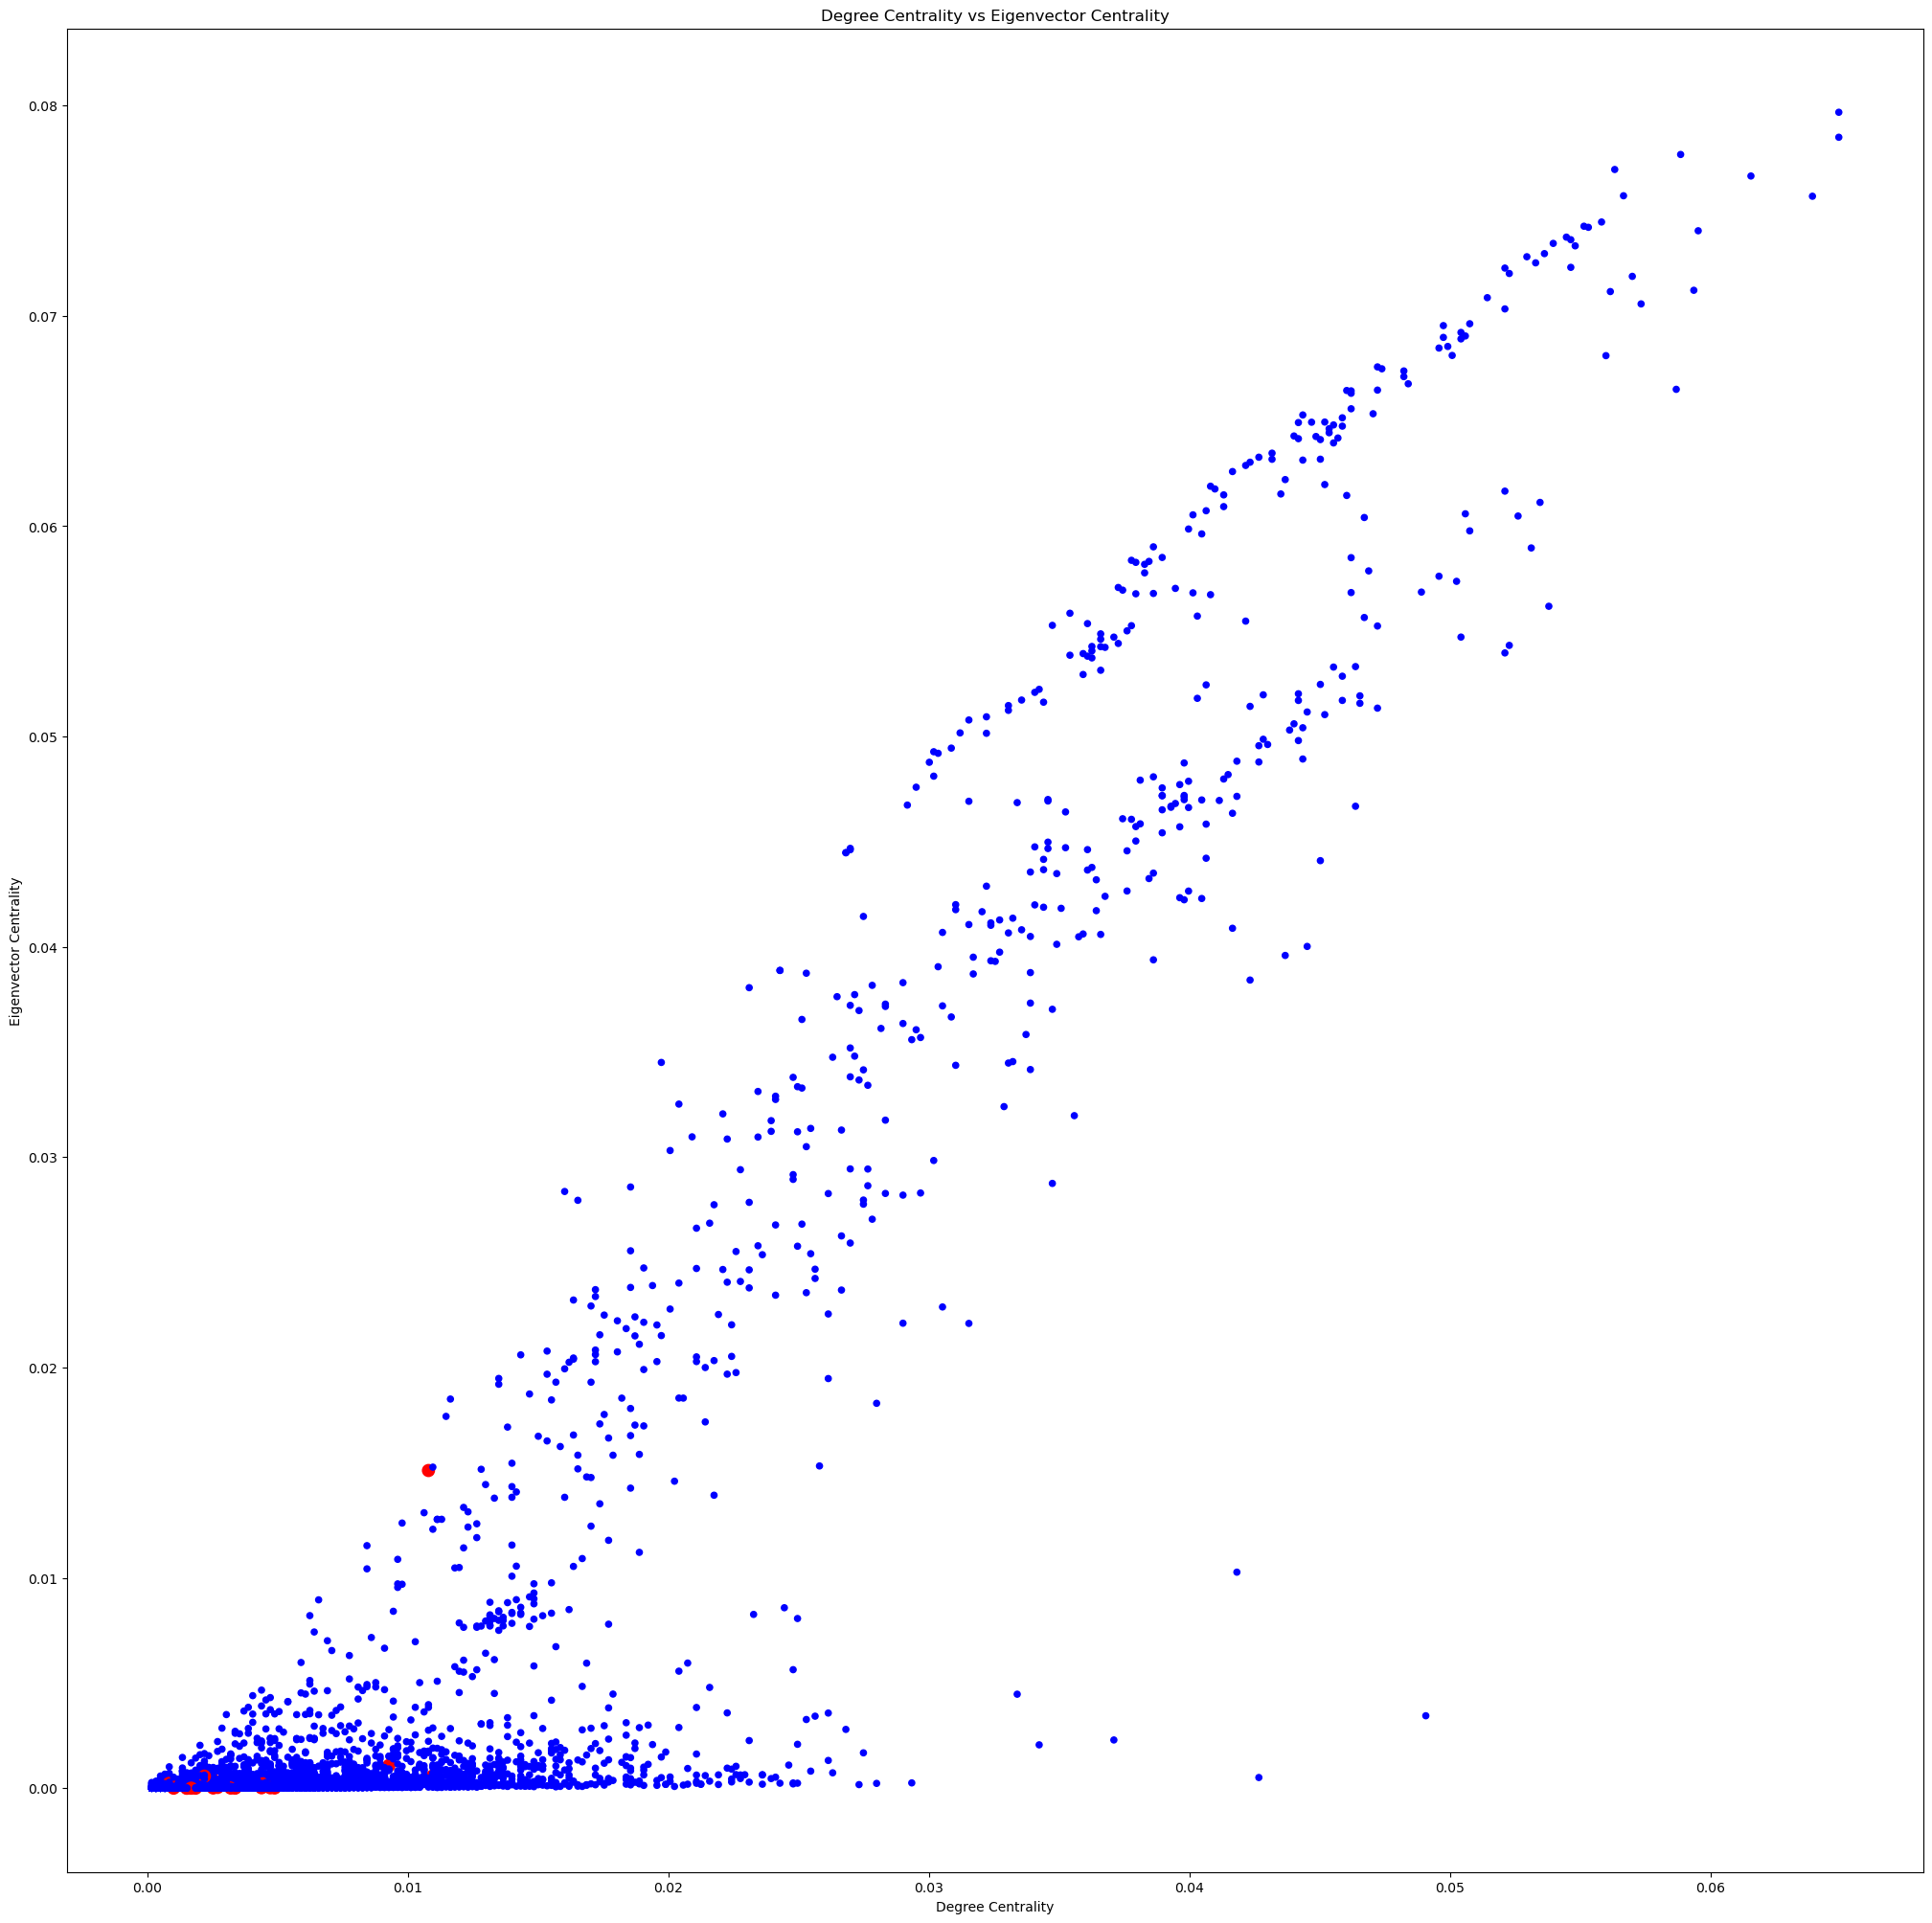

In [19]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, eigen_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality")
plt.show()

Plot of degree centrality vs closeness centrality

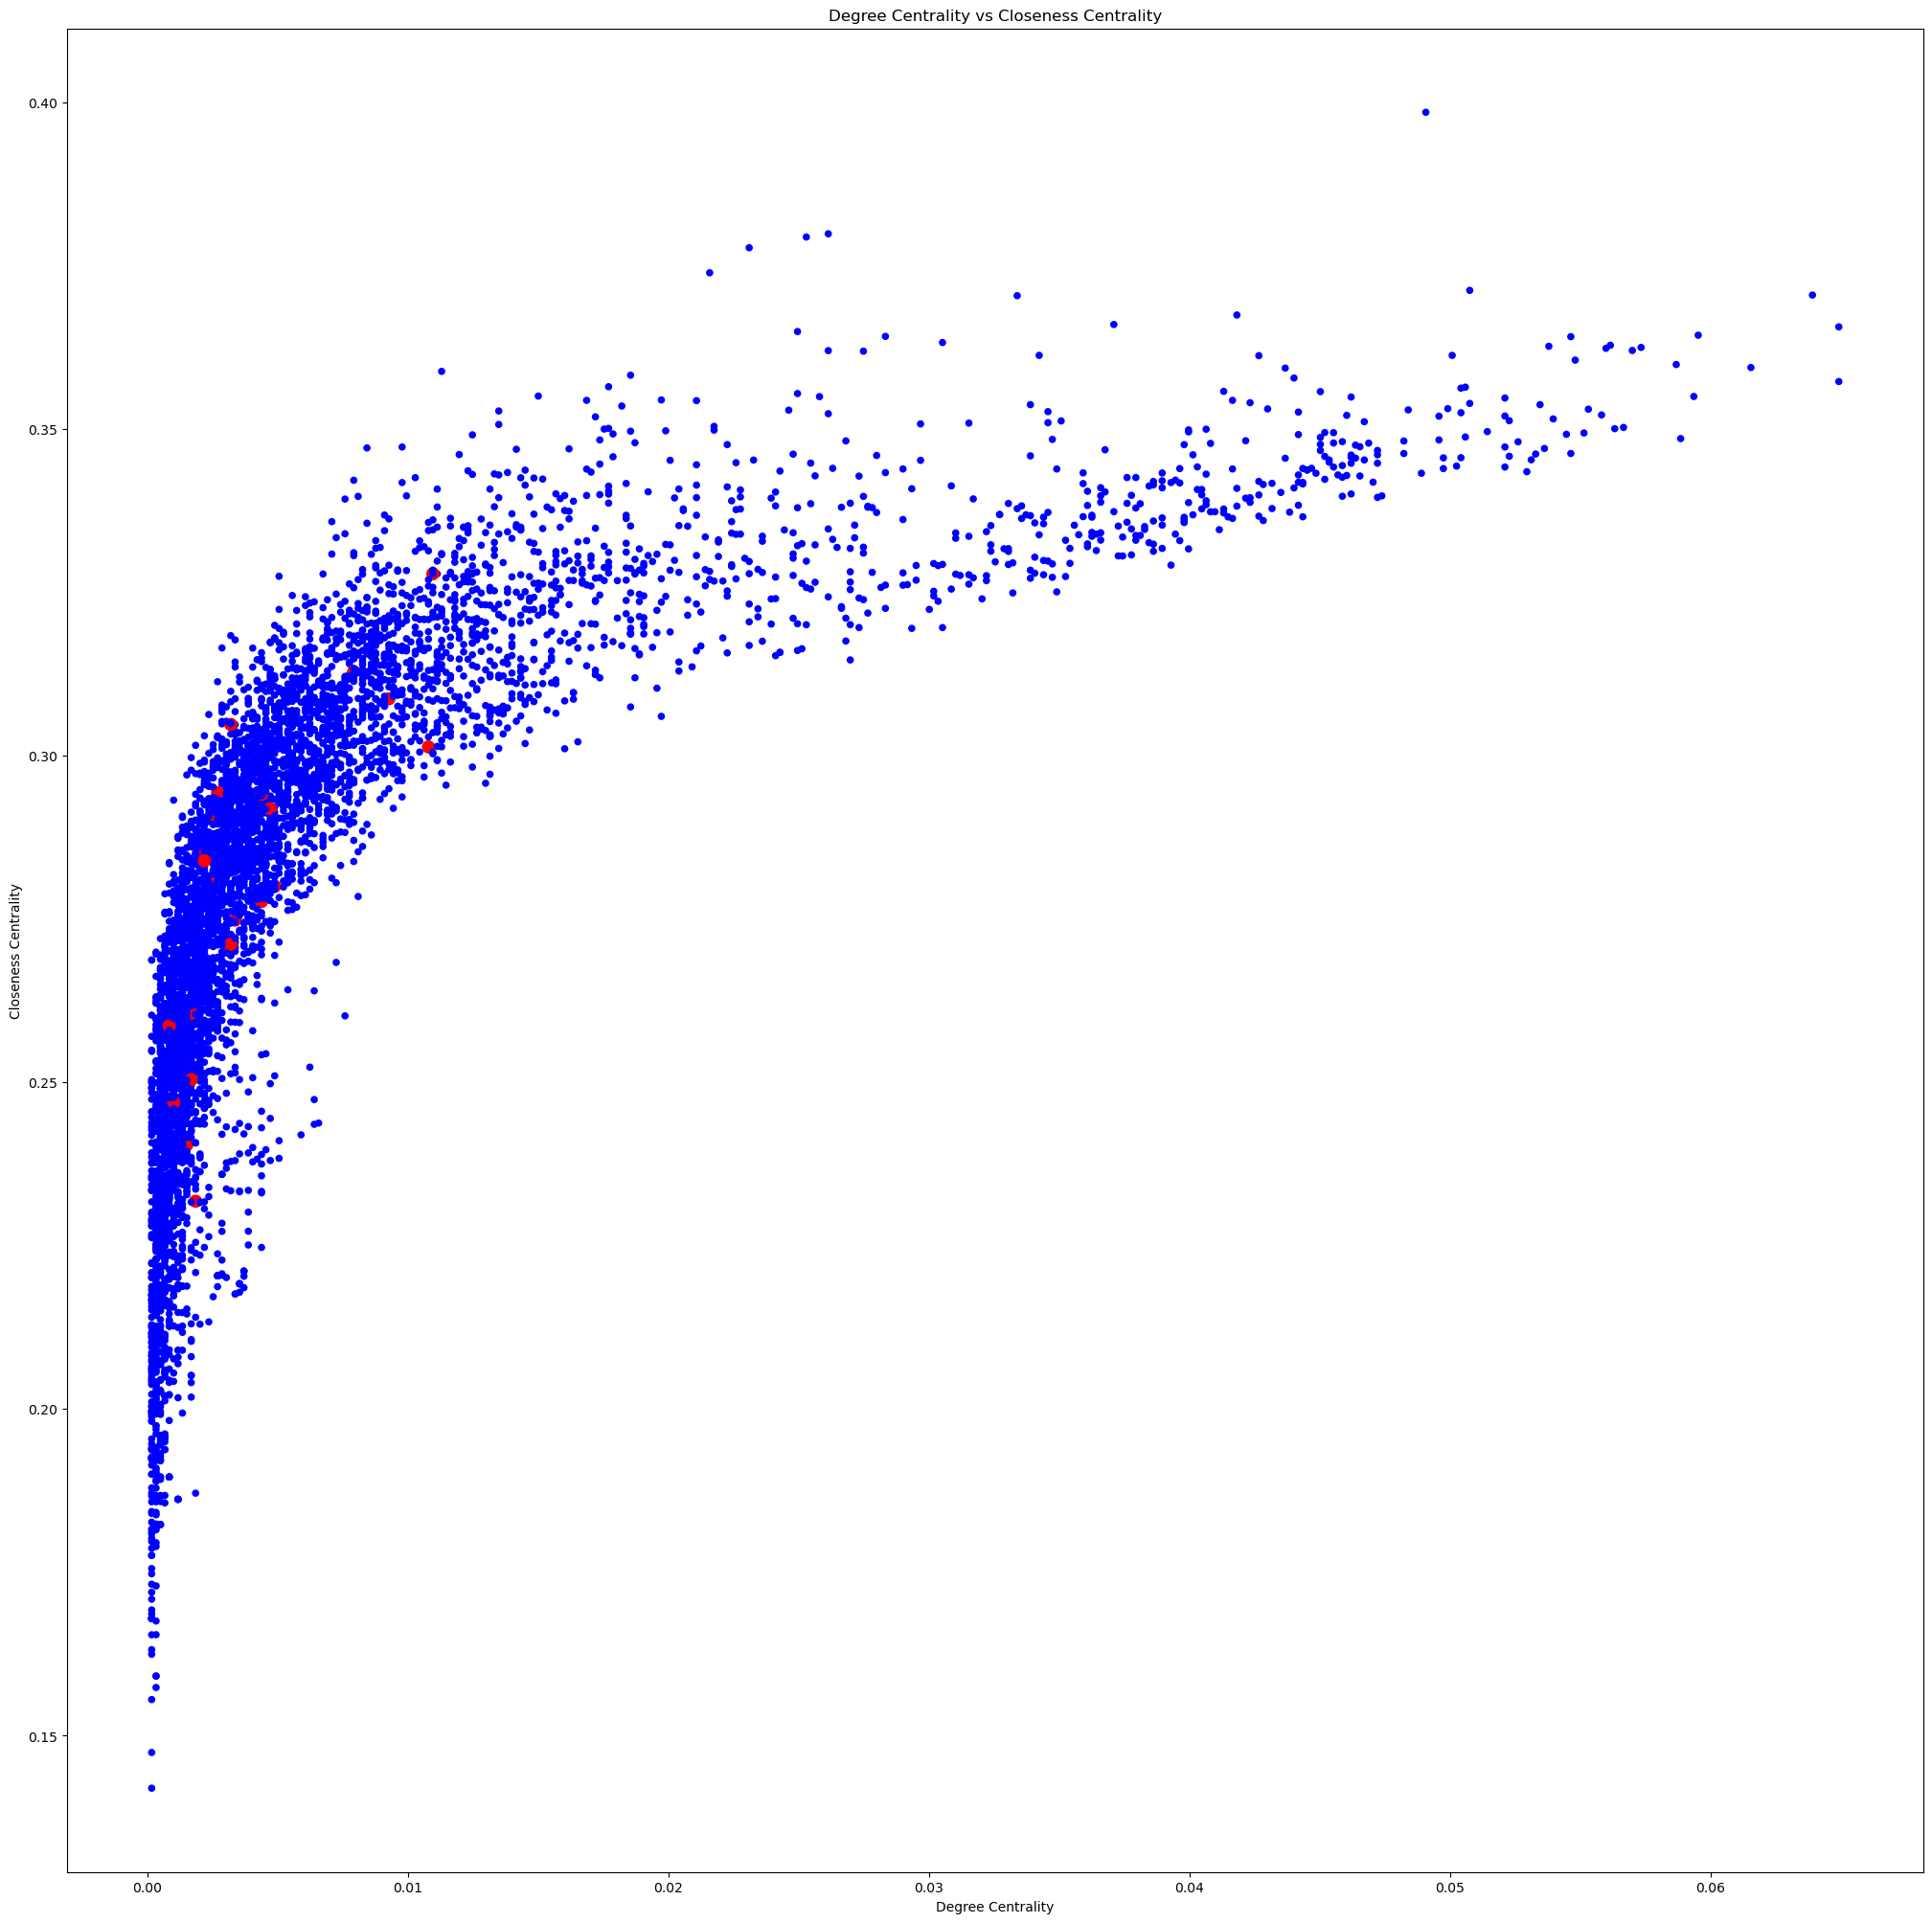

In [20]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, closeness_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality")
plt.show()

Degree centrality vs betweeness centrality

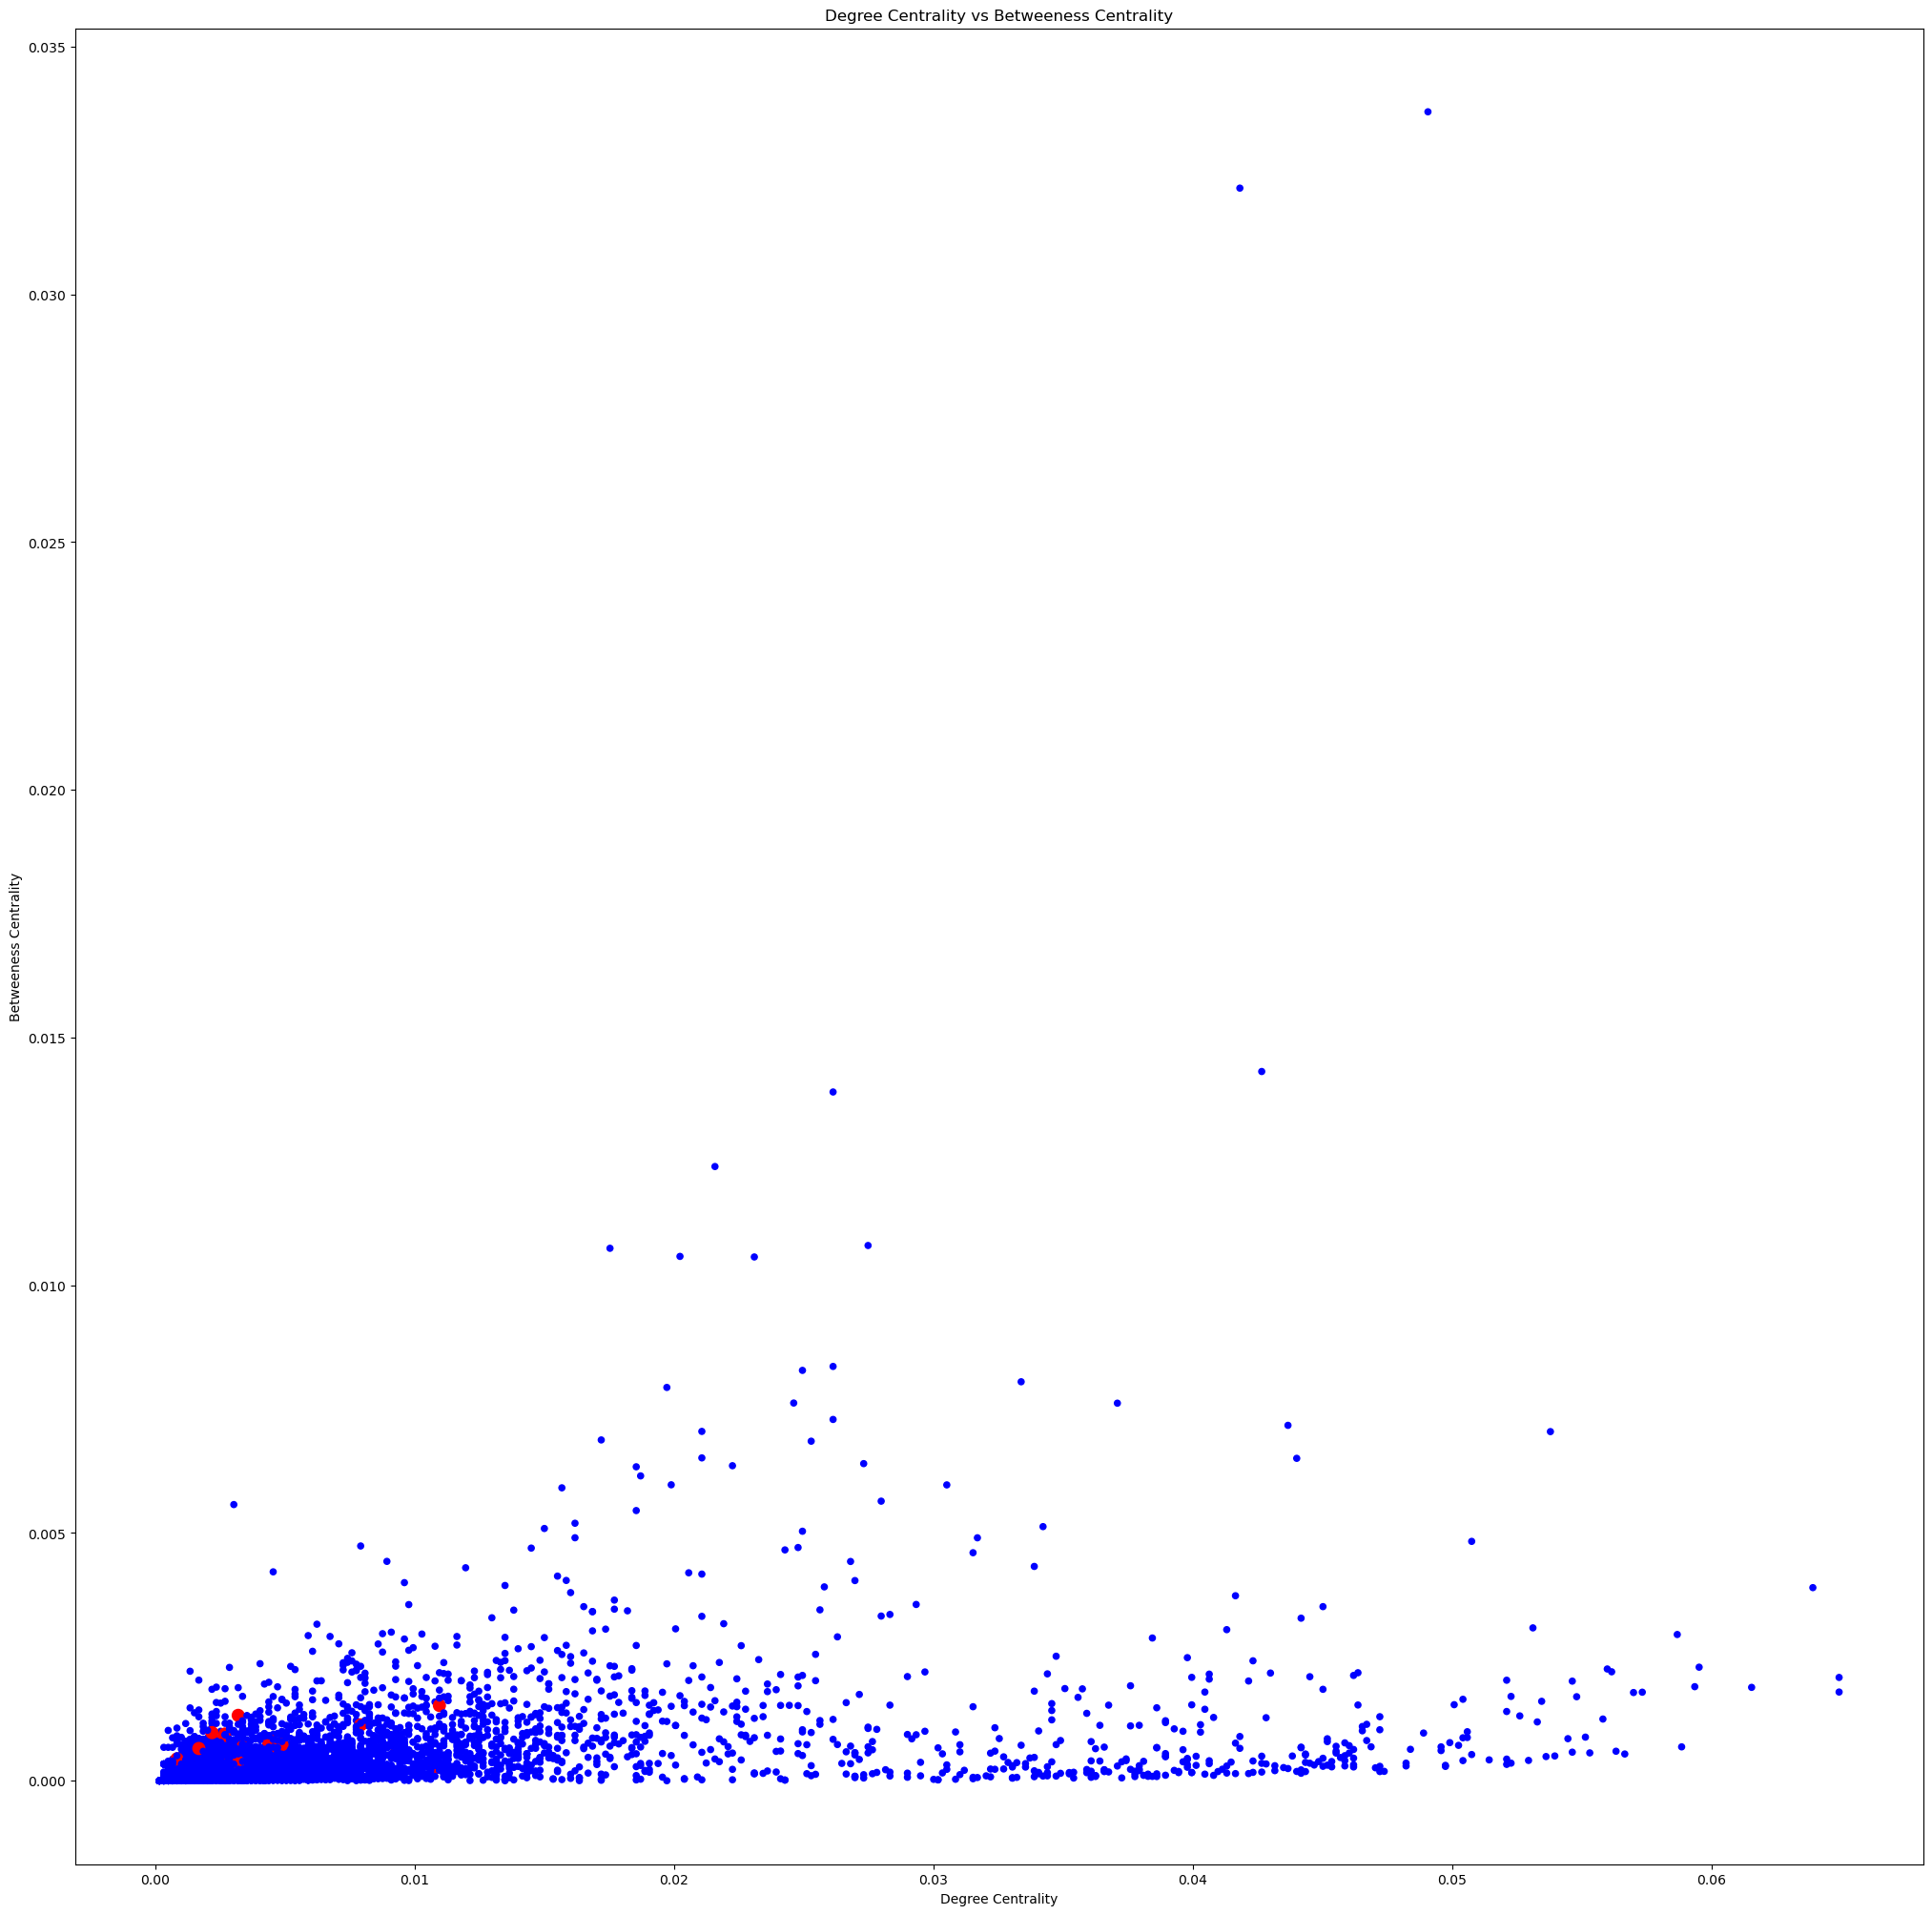

In [21]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, betweeness_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality")
plt.show()

Degree centrality vs subgraph centrality

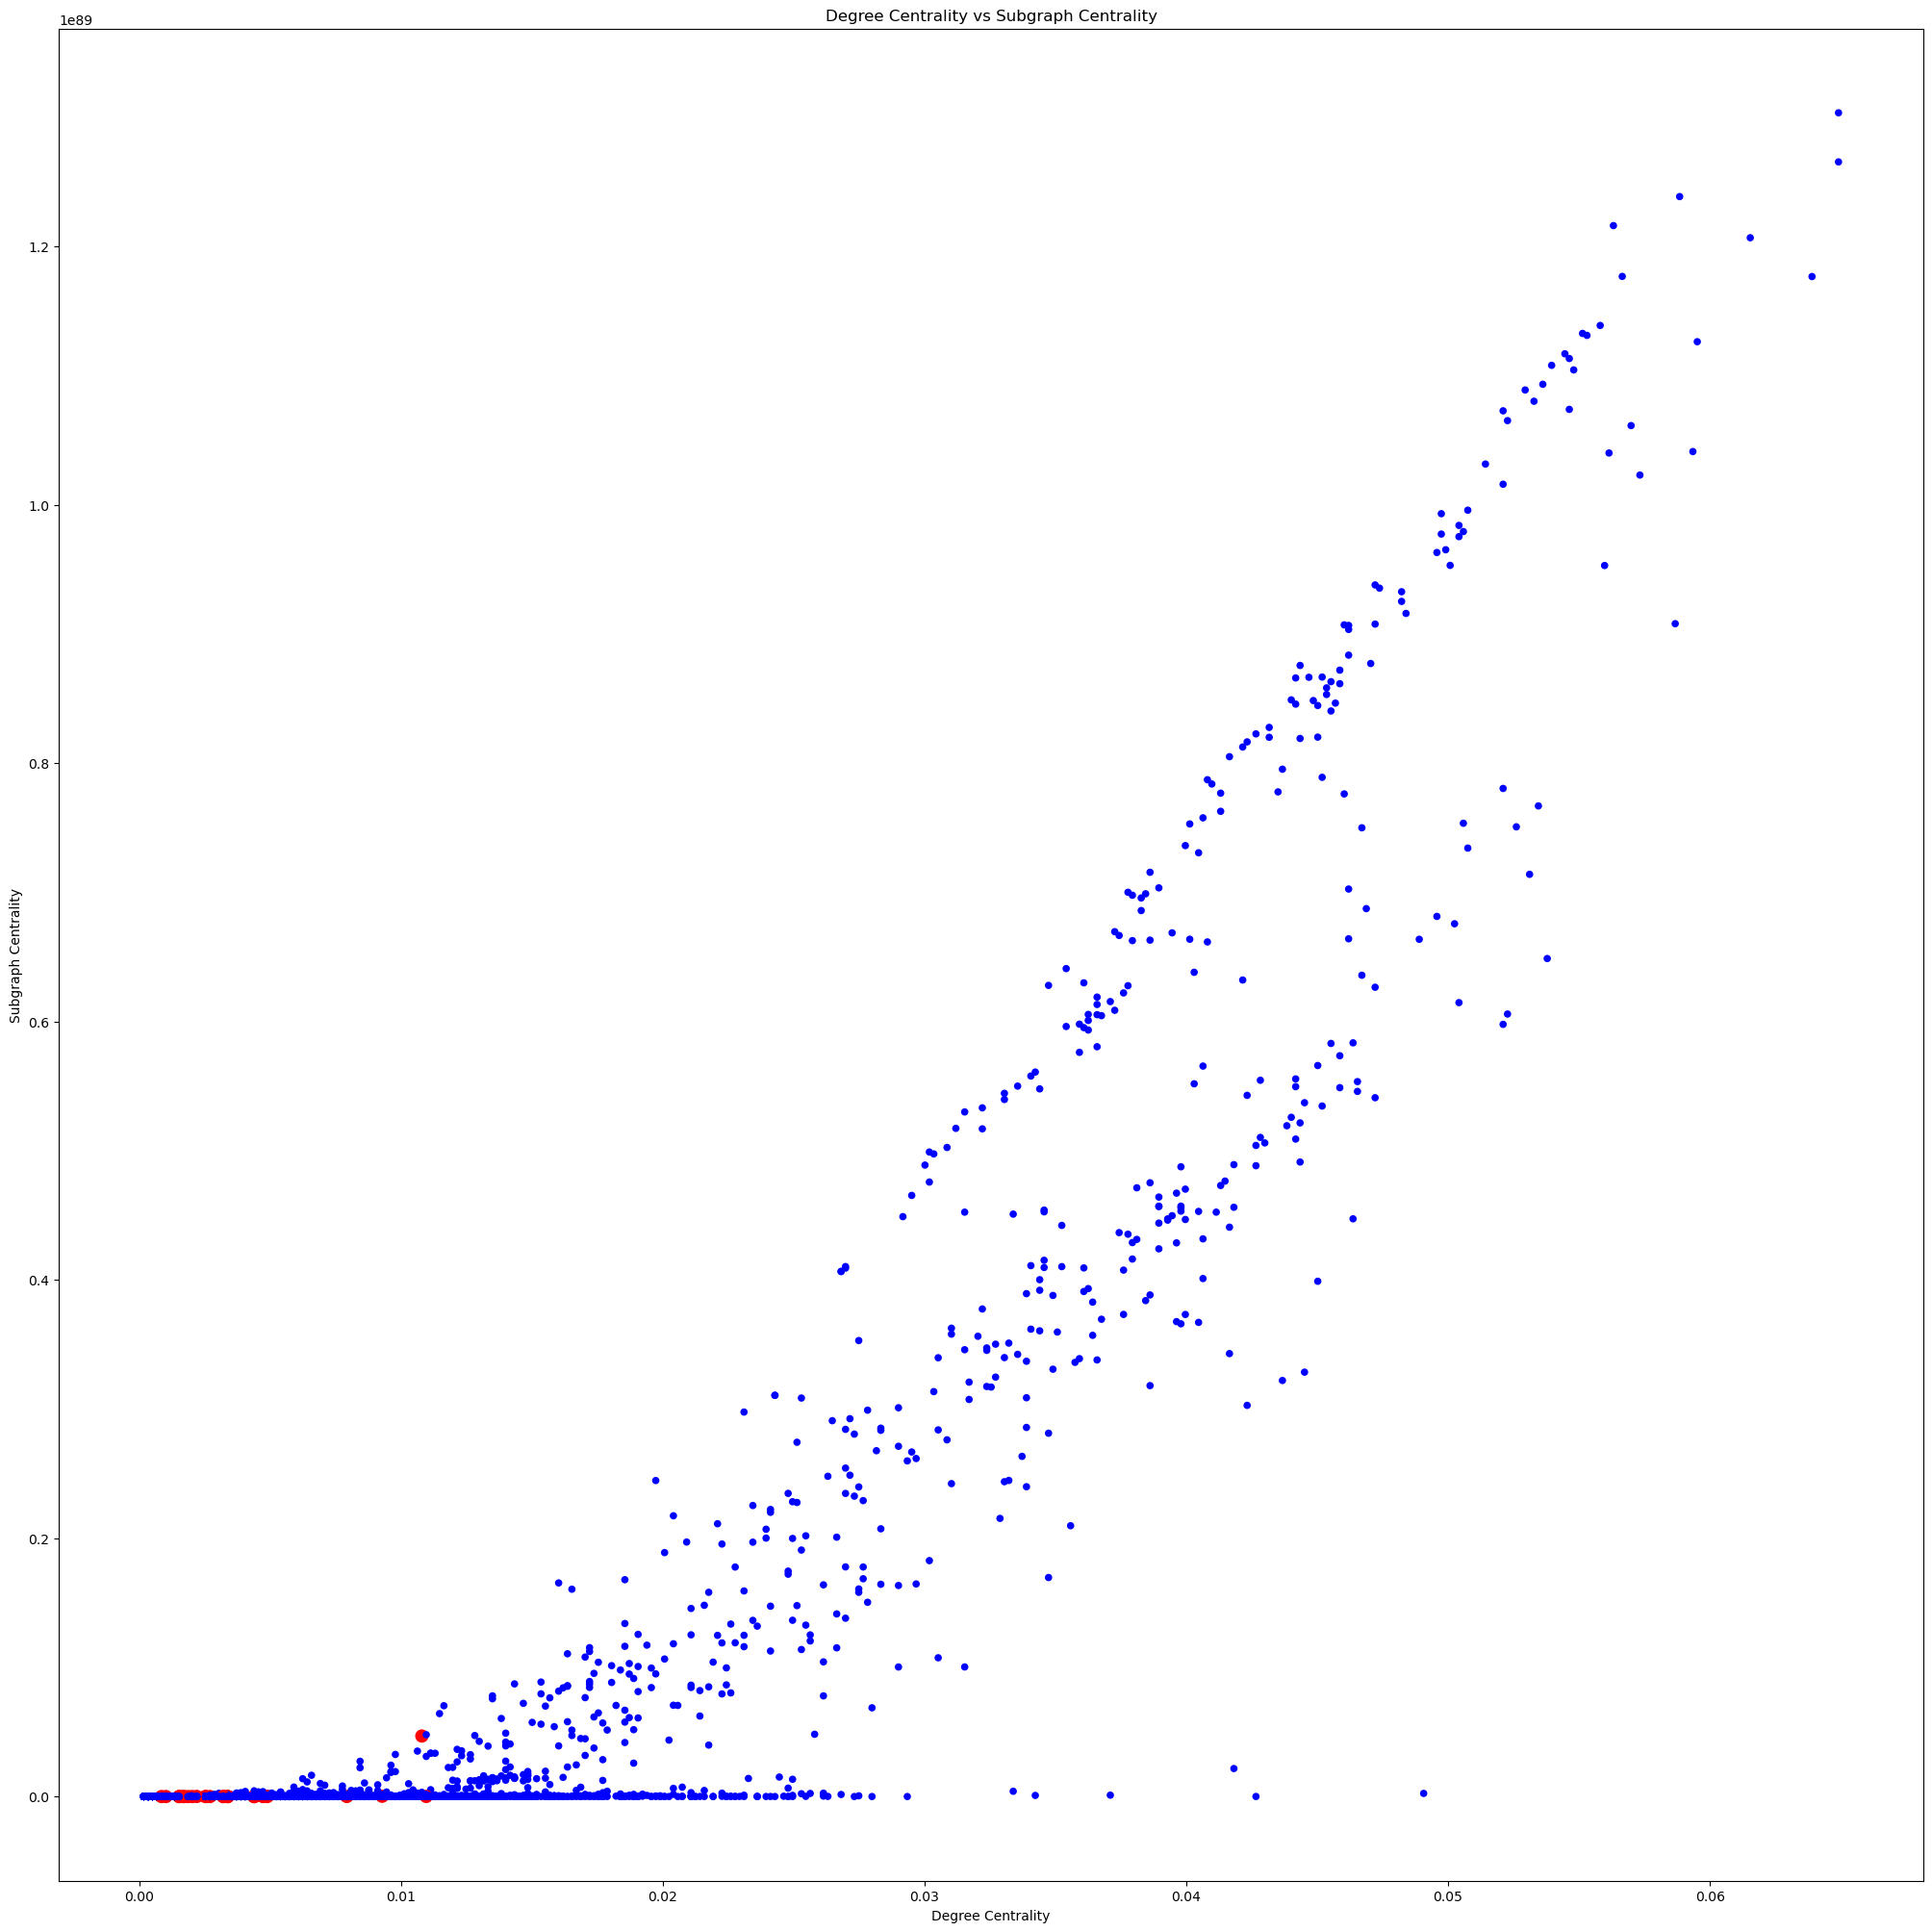

In [22]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, subgraph_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality")
plt.show()

Doing the same thing but now with the restricted graph

In [38]:
import pandas as pd
df = pd.read_csv("human_to_yeast.csv")
homologs = list(set(list(df["homolog_systematic_name"])))
l = homologs.copy()
l.extend(interesting_nodes)
H = G.subgraph(l).copy()
H0 = G.subgraph(max(nx.connected_components(H), key = len)).copy()

In [46]:
NAFLD_degree_centrality = nx.degree_centrality(H0)
NAFLD_eigenvector_centrality = nx.eigenvector_centrality(H0)
NAFLD_closeness_centrality = nx.closeness_centrality(H0)
NAFLD_betweeness = nx.betweenness_centrality(H0)
NAFLD_subgraph = nx.subgraph_centrality(H0)

In [51]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
node_colours = []
node_sizes = []
for key in H0.nodes():
    degree_x.append(NAFLD_degree_centrality[key])
    eigen_y.append(NAFLD_eigenvector_centrality[key])
    closeness_y.append(NAFLD_closeness_centrality[key])
    betweeness_y.append(NAFLD_betweeness[key])
    subgraph_y.append(NAFLD_subgraph[key])
    if key in interesting_nodes:
        node_colours.append("red")
        node_sizes.append(20*4)
    else:
        node_colours.append("blue")
        node_sizes.append(10)

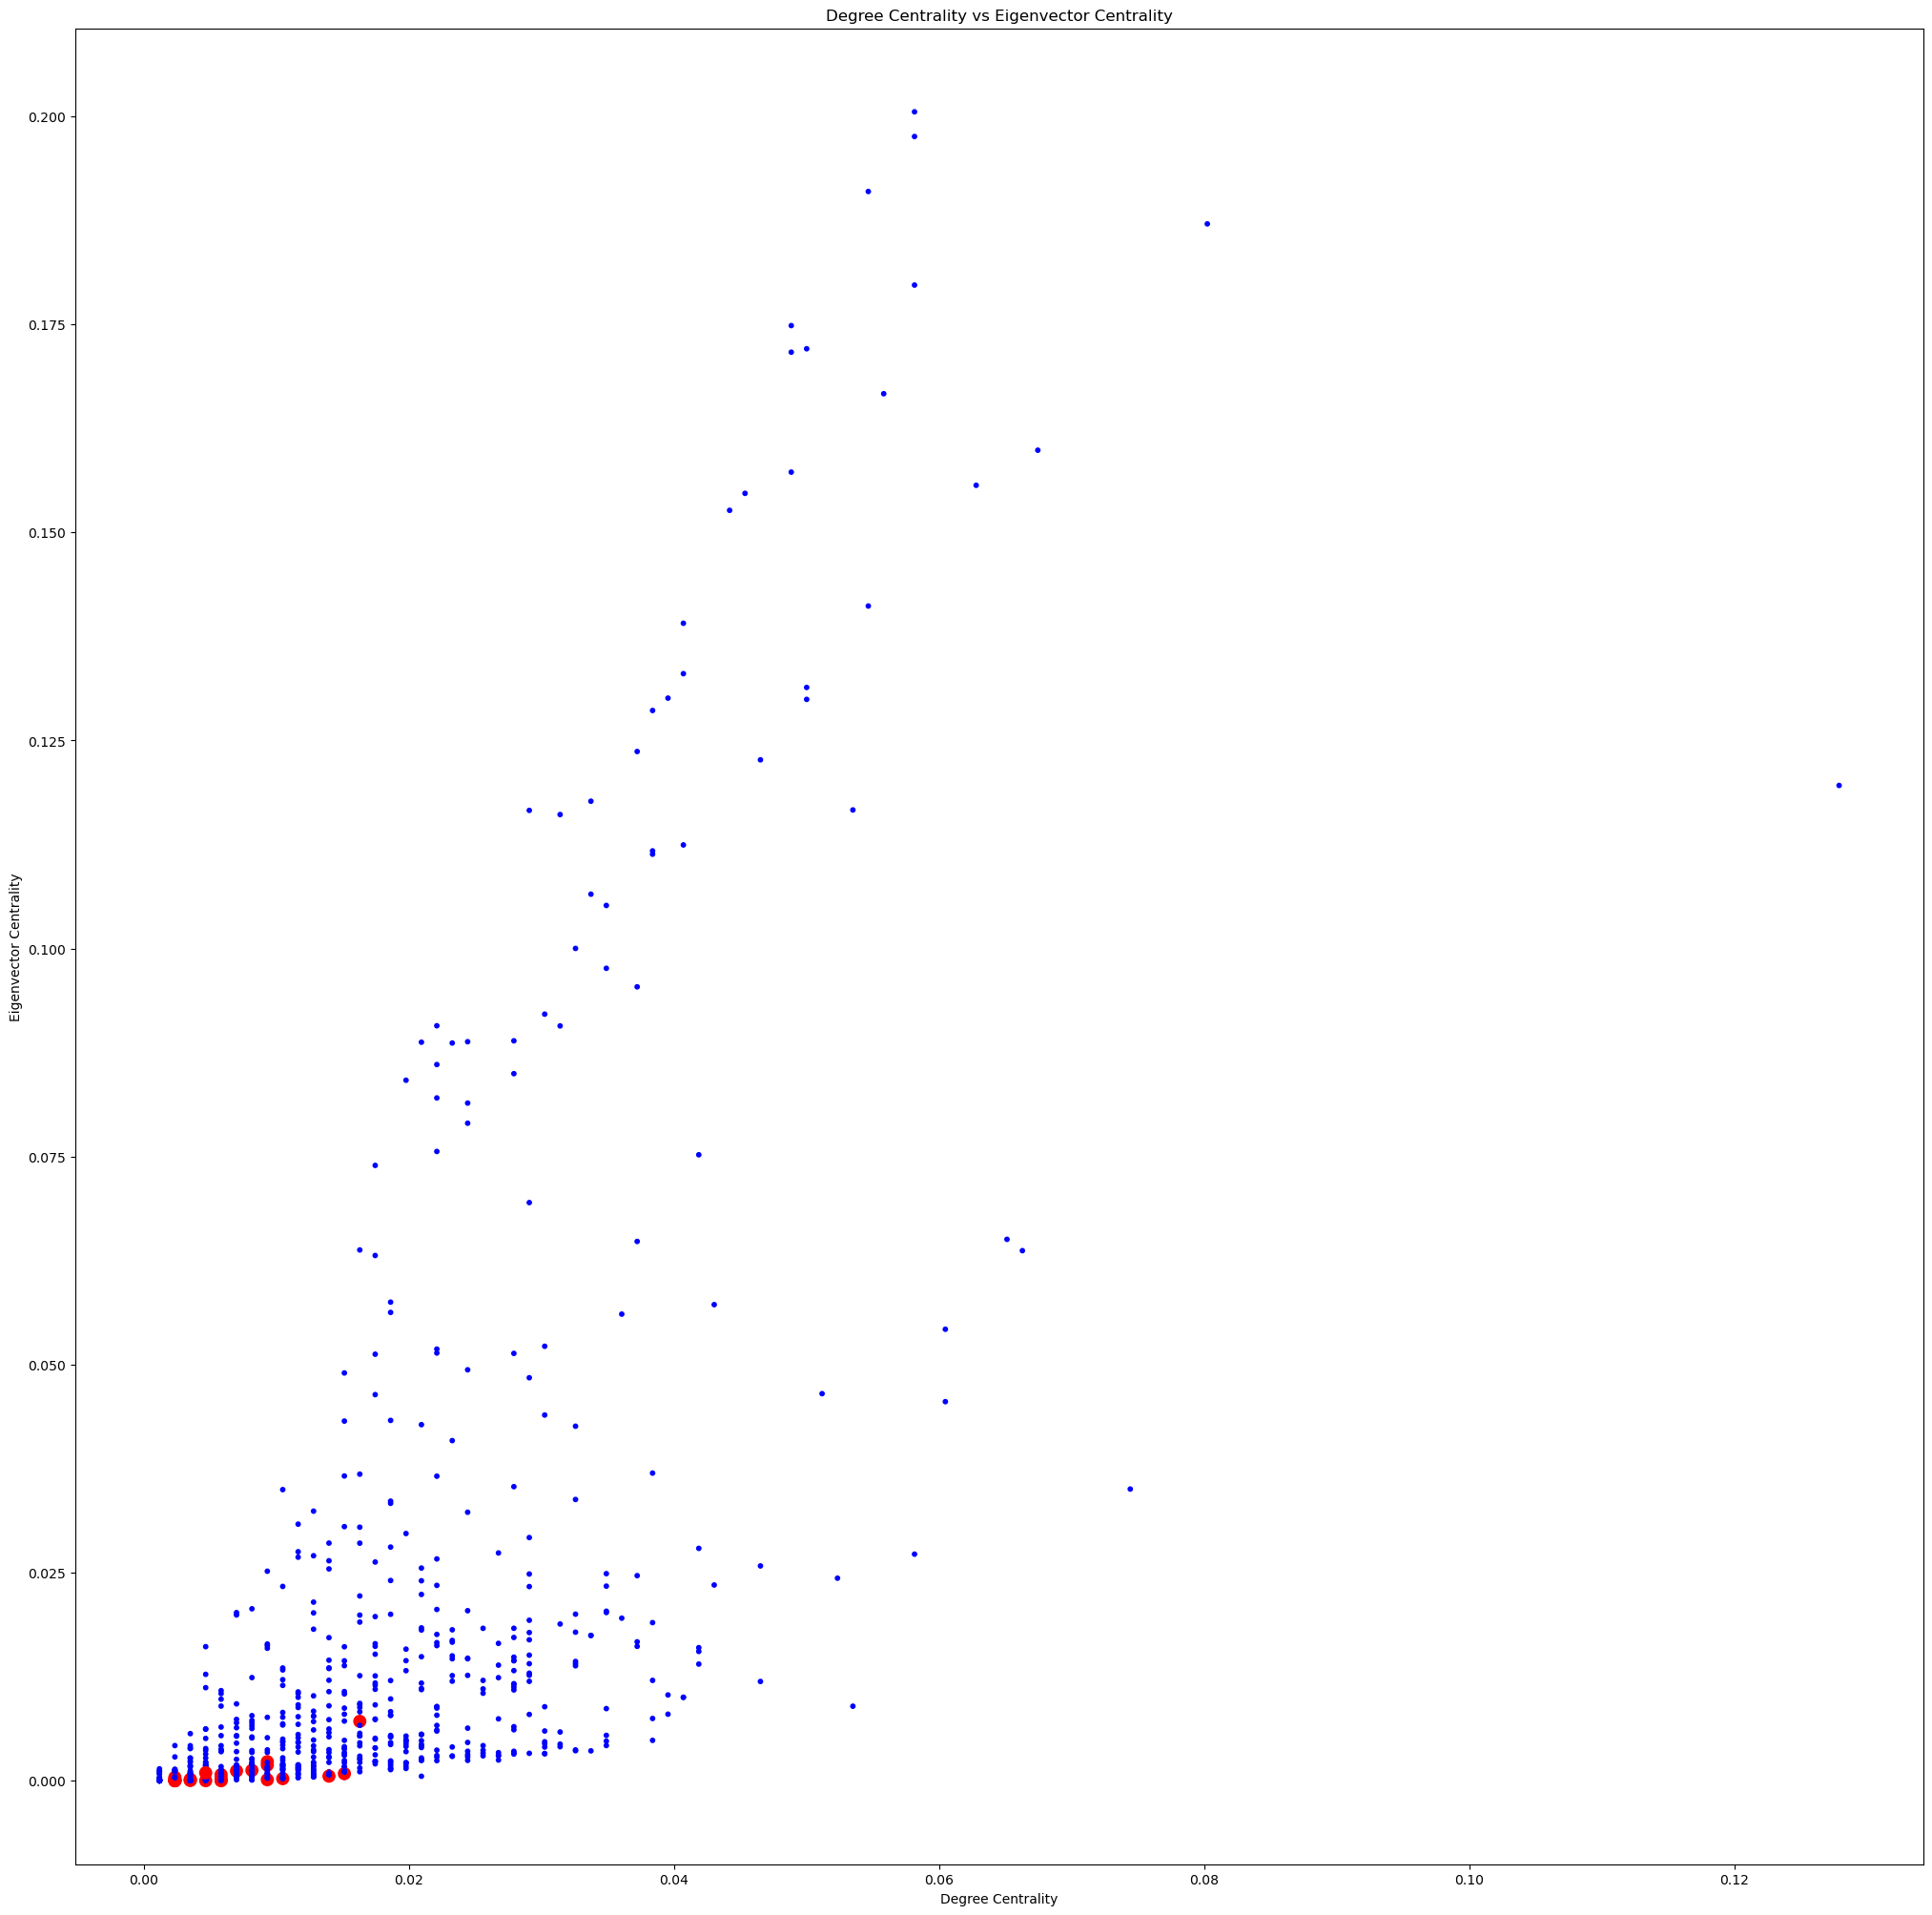

In [52]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, eigen_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality")
plt.show()

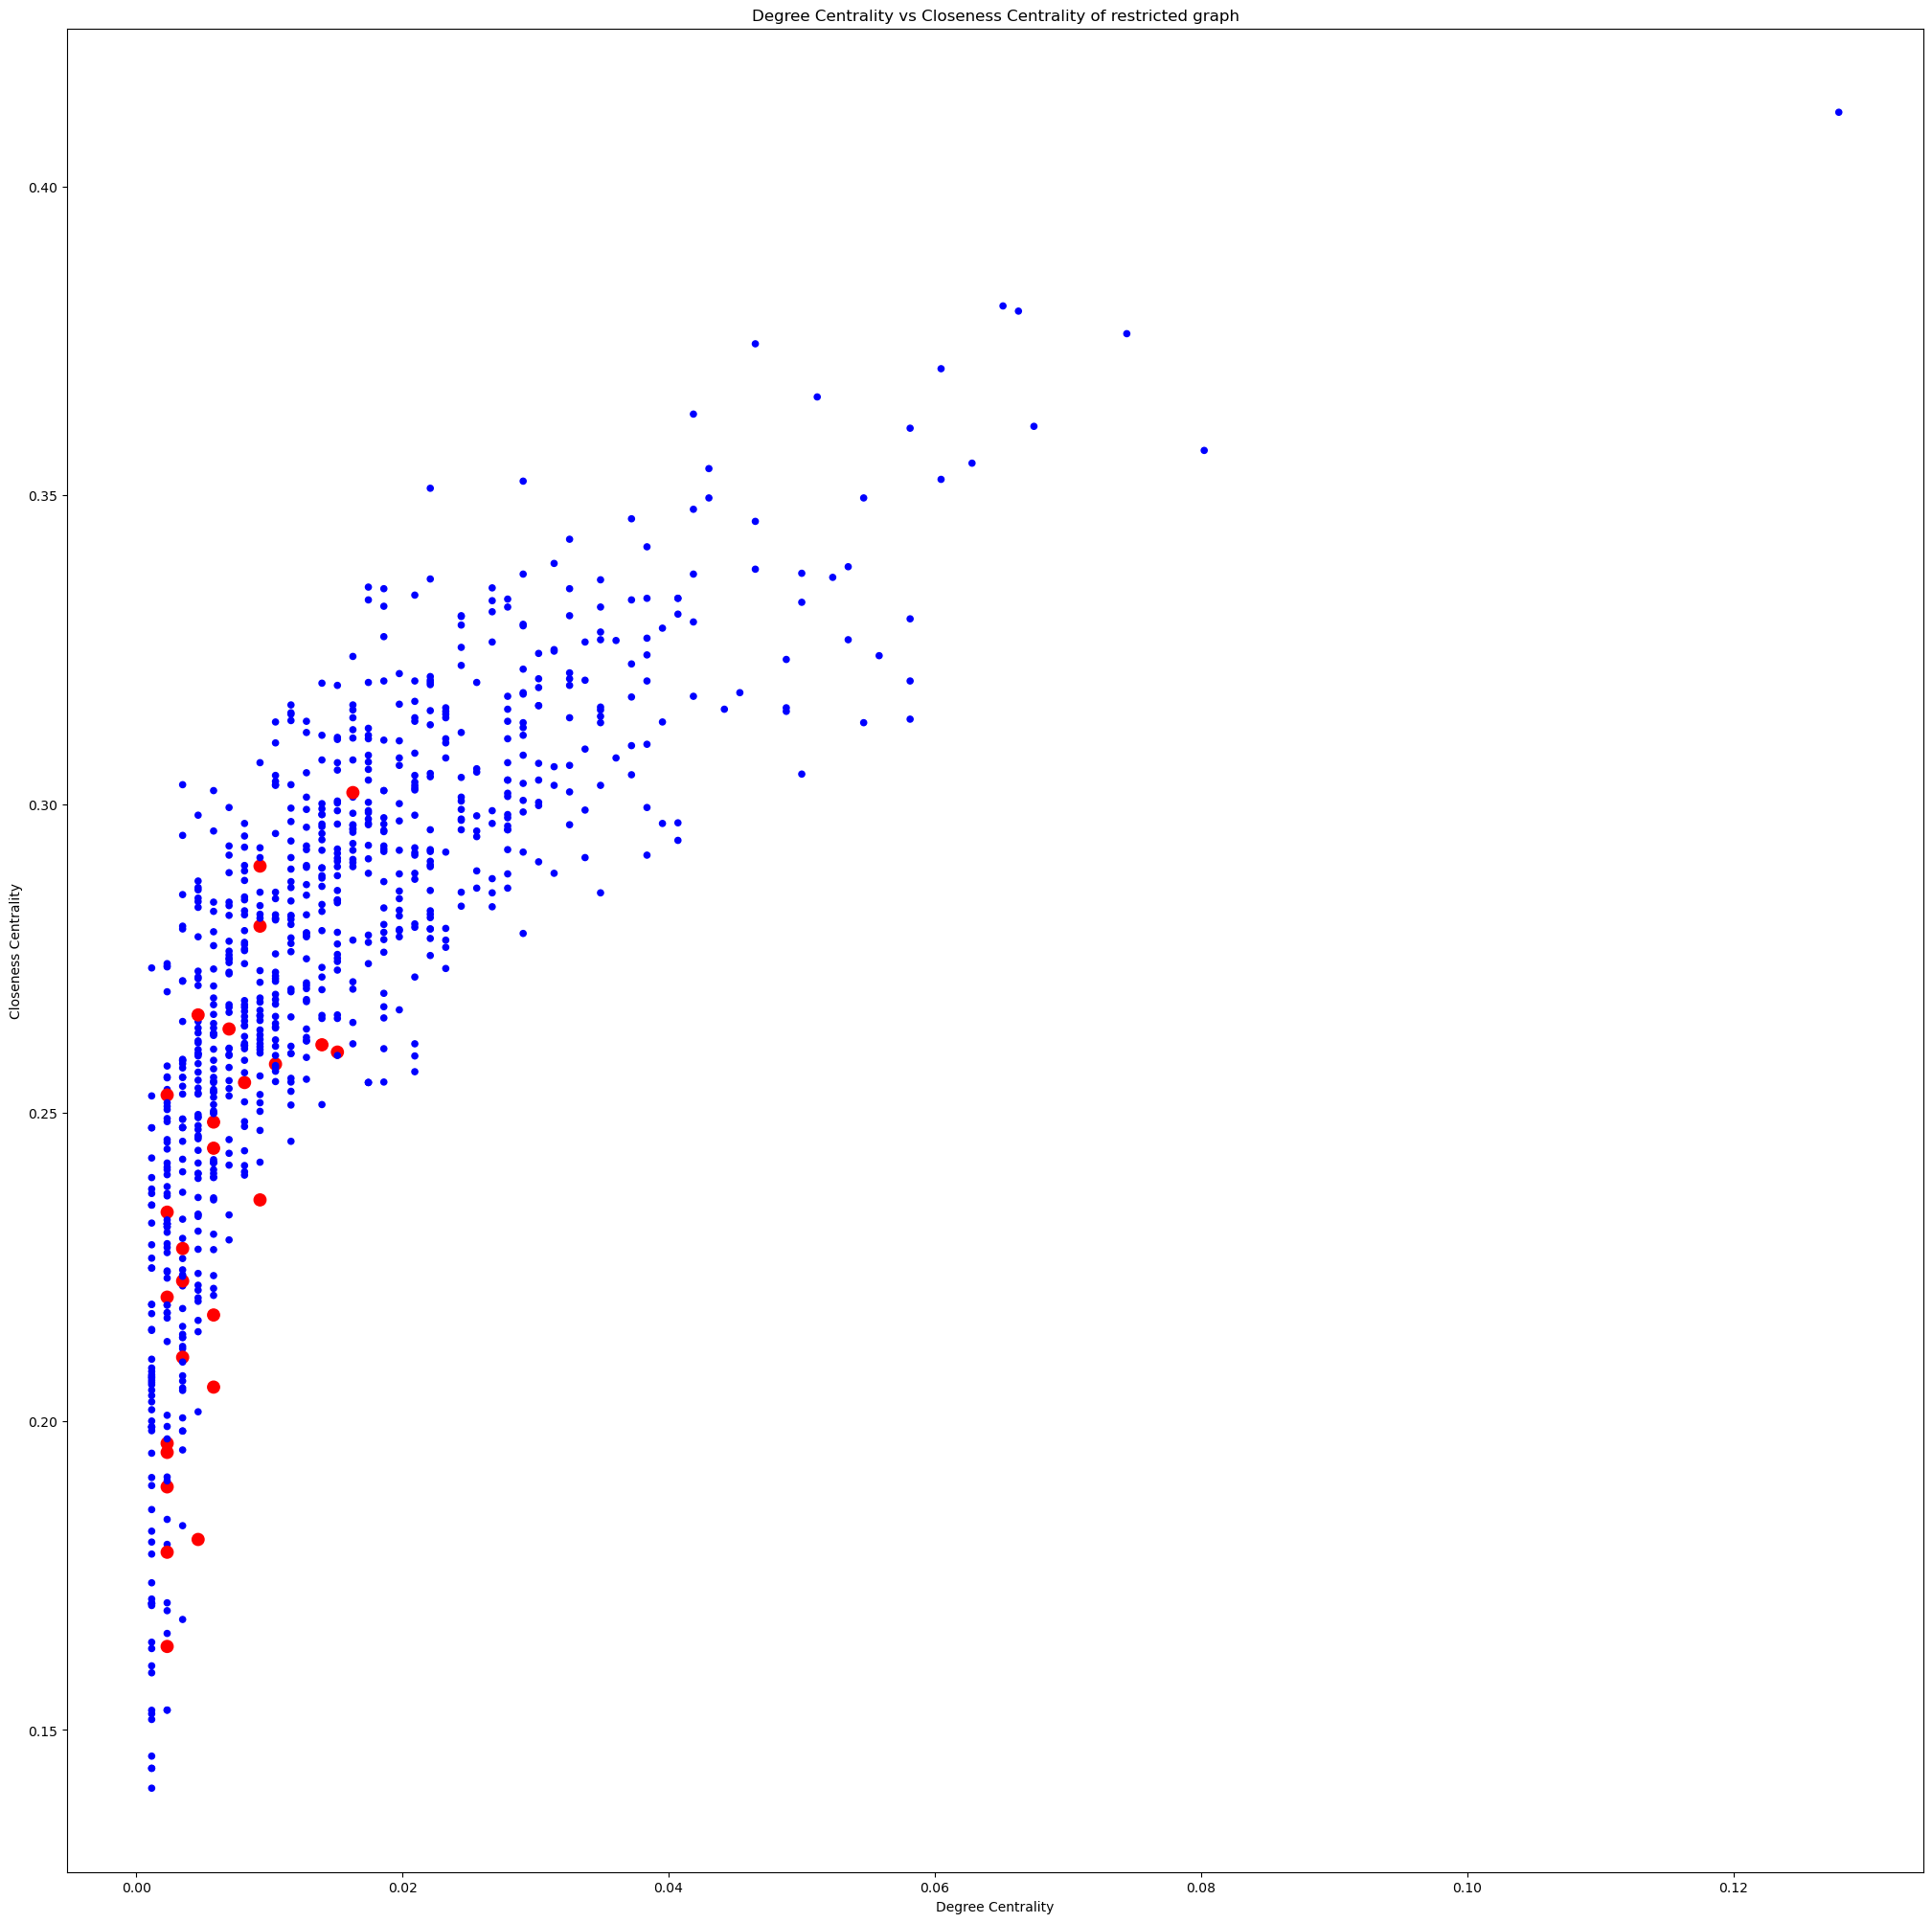

In [42]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, closeness_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality of restricted graph")
plt.show()

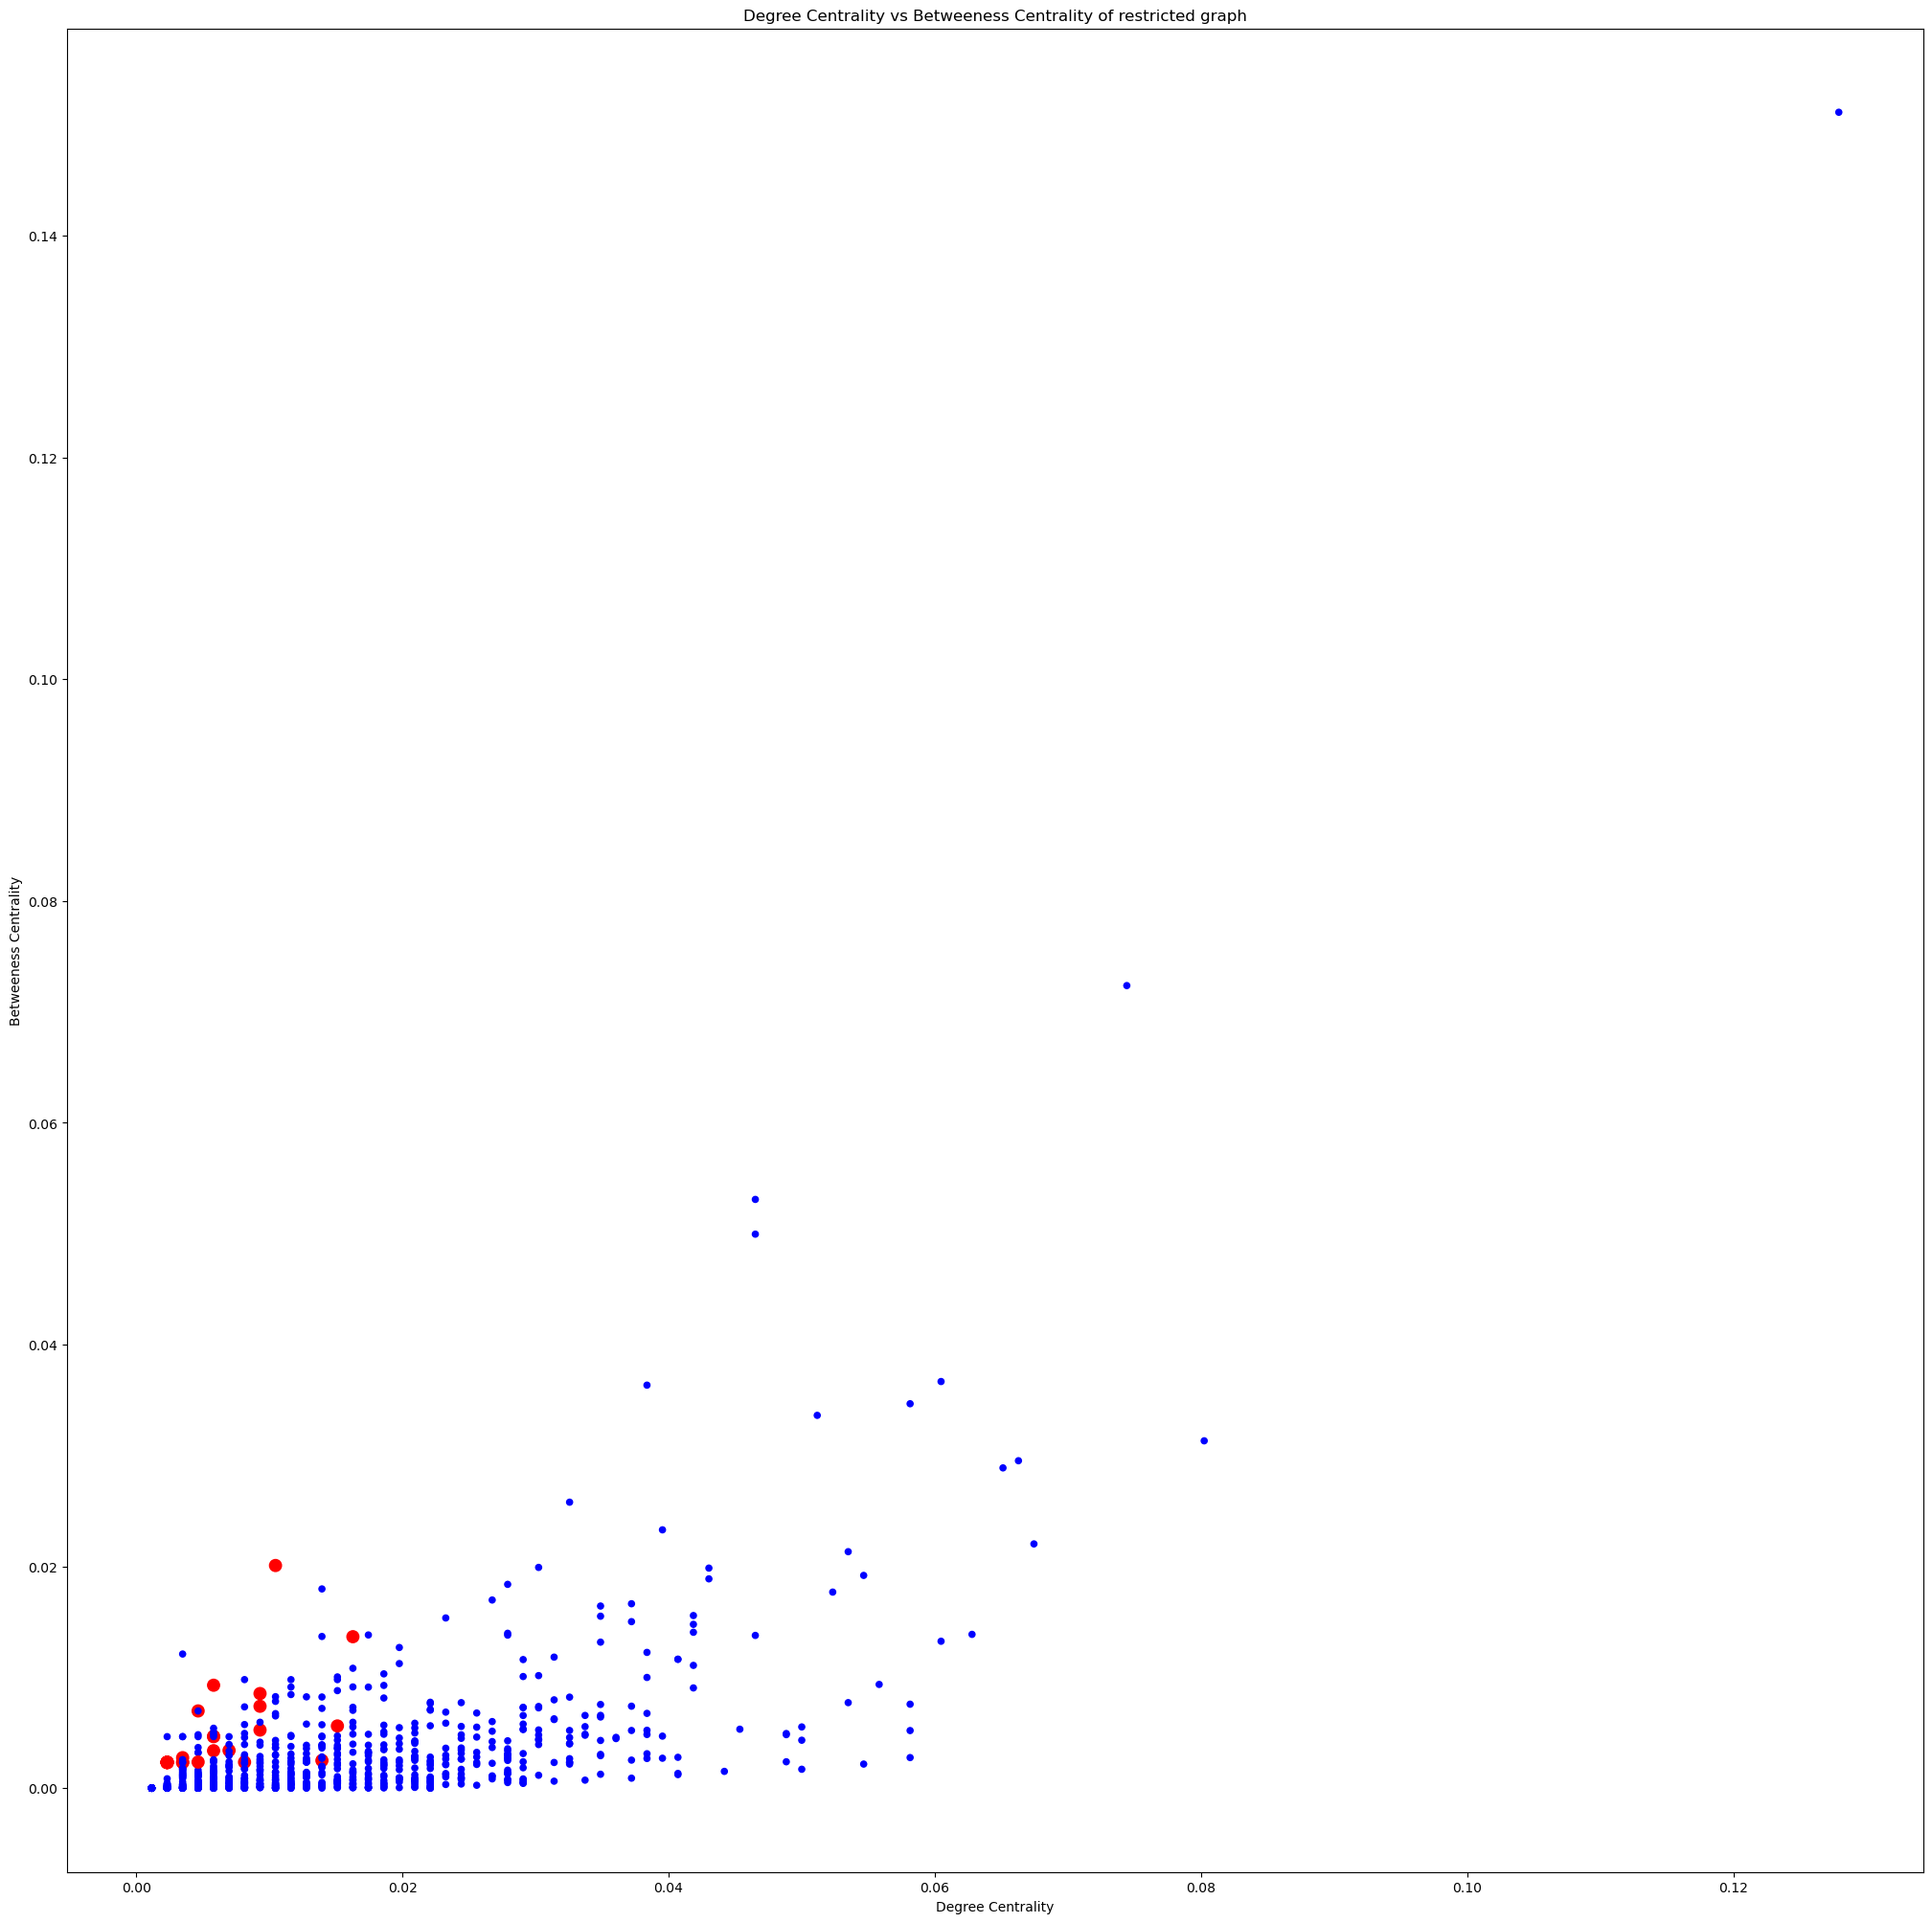

In [43]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, betweeness_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality of restricted graph")
plt.show()

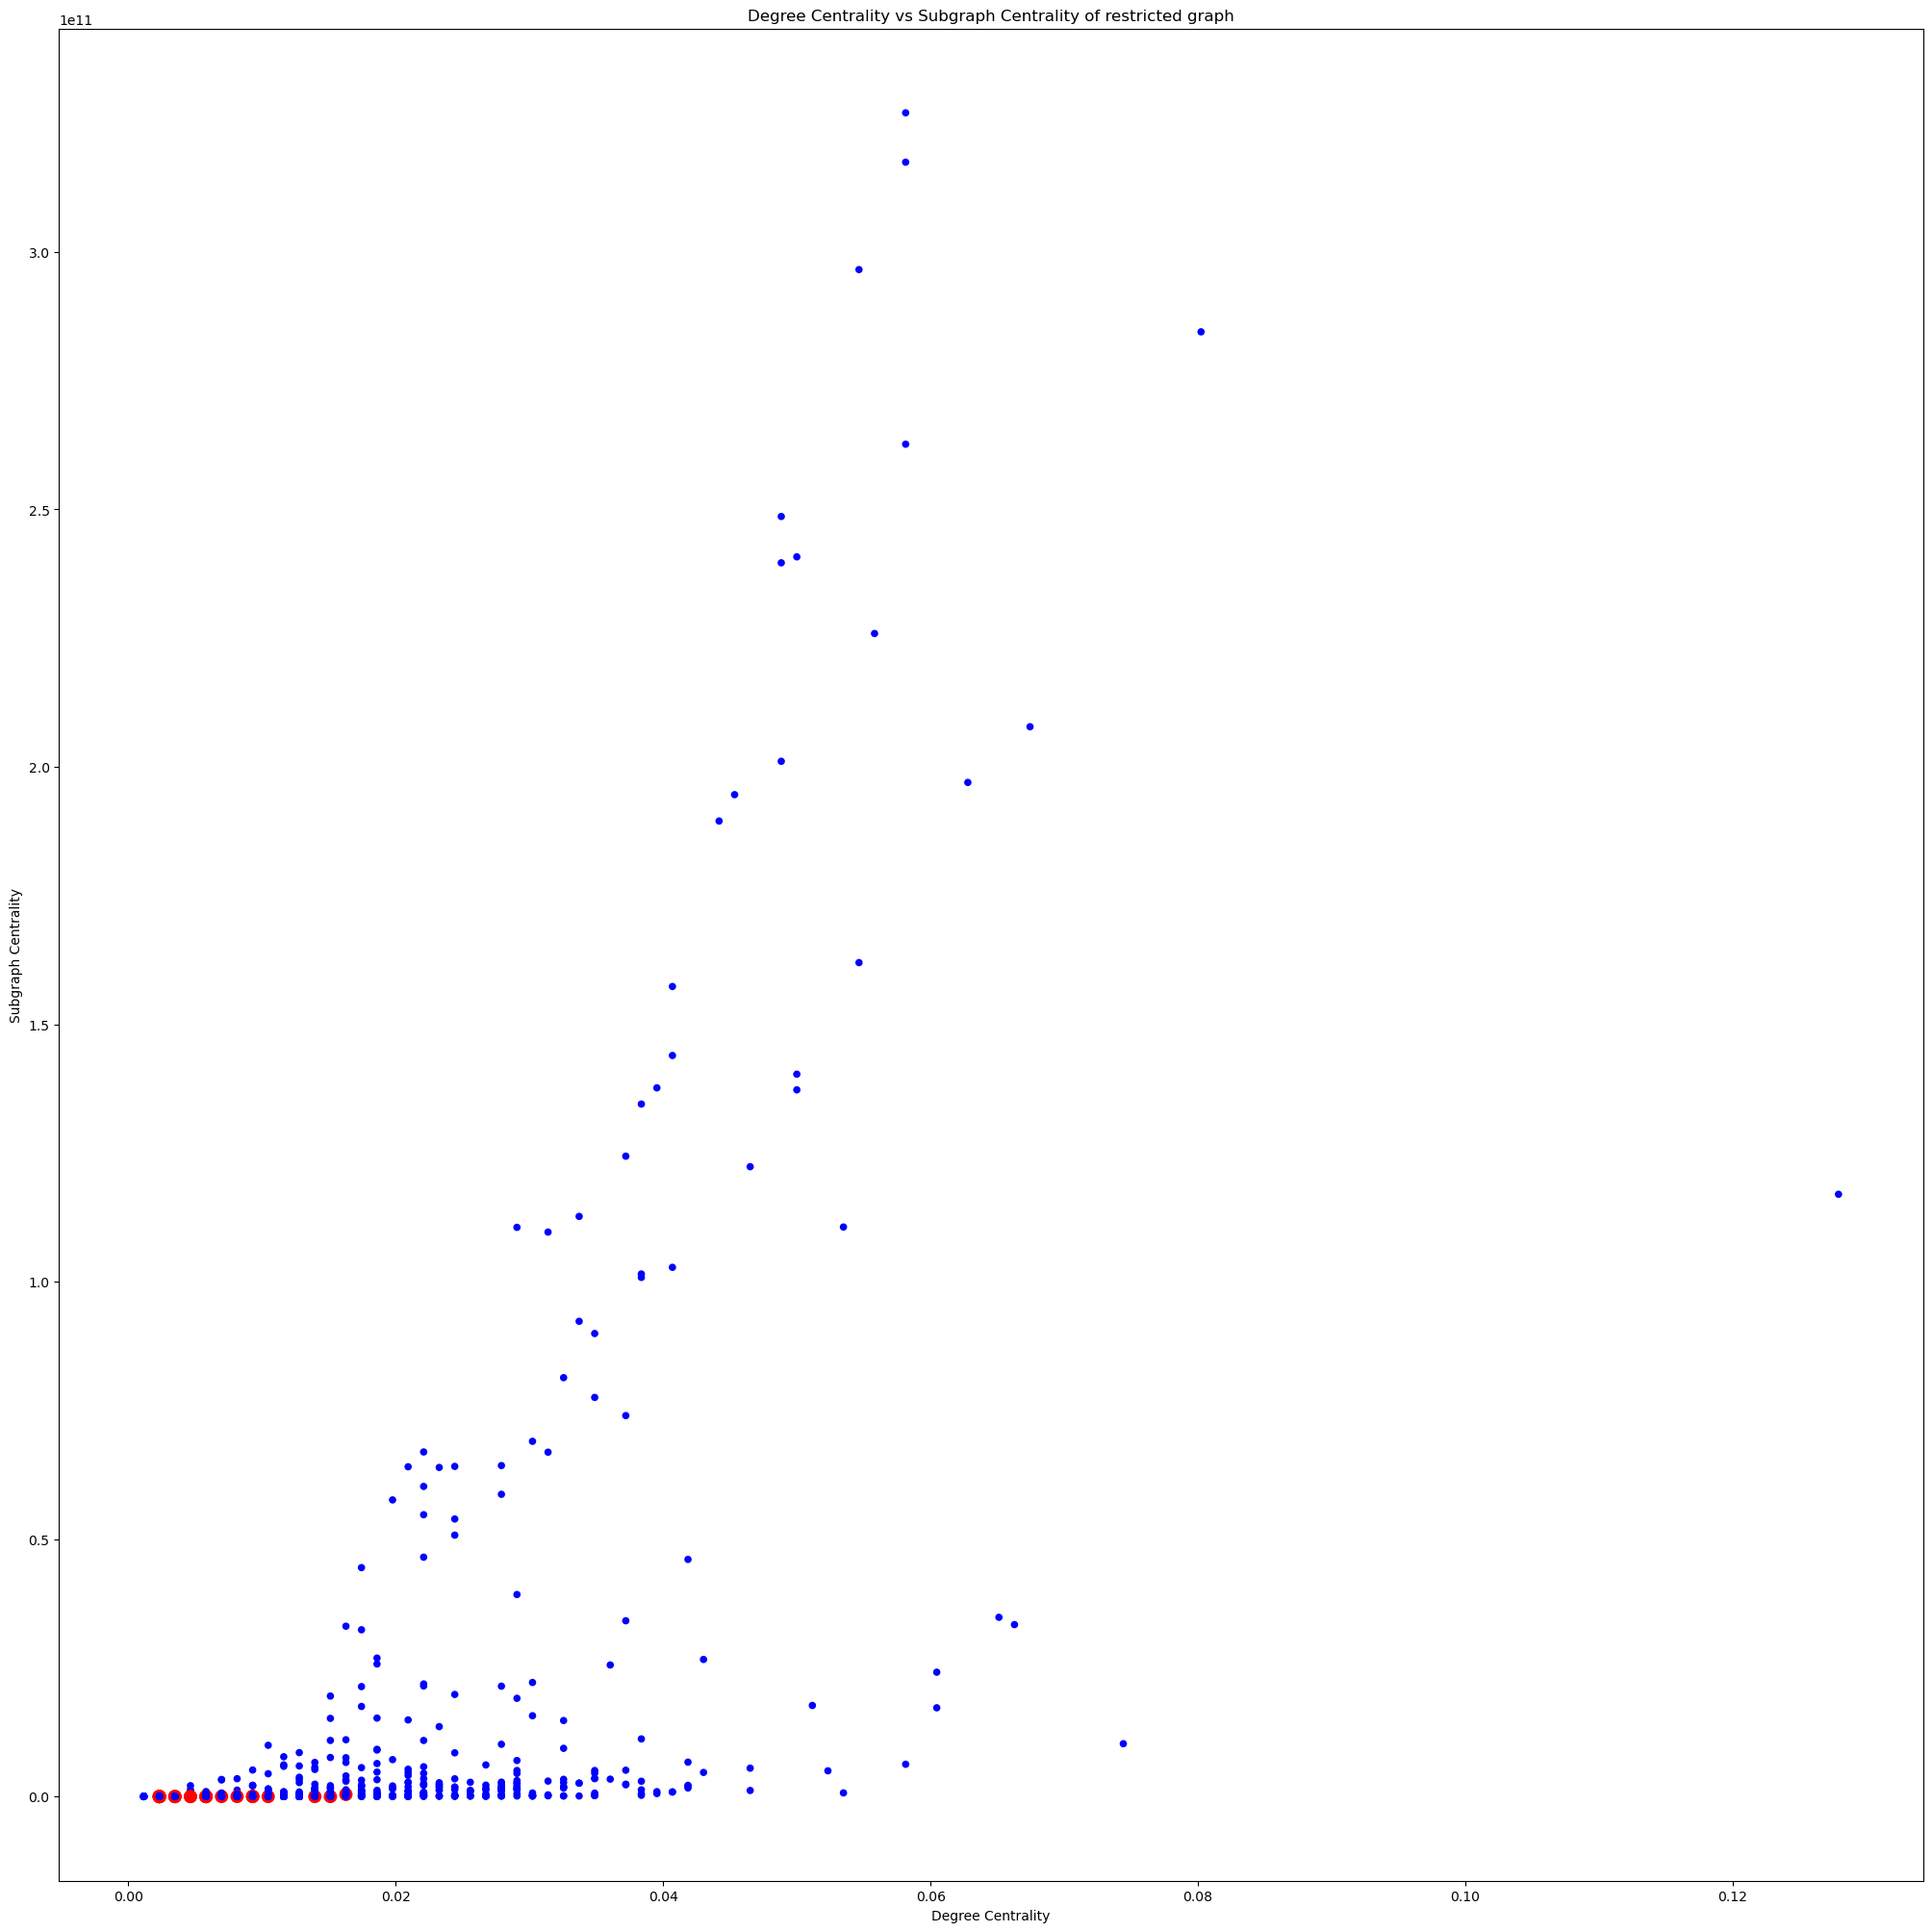

In [44]:
plt.figure(figsize = (25, 25))
plt.scatter(degree_x, subgraph_y, c = node_colours, s = node_sizes)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality of restricted graph")
plt.show()